<a href="https://colab.research.google.com/github/okzeesh/Implementation-of-CPU-Scheduling-Algorithms/blob/main/2022644_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# First-Come, First-Served Scheduling Algorithm

---

### **Overview of the FCFS Scheduling Code**

This code implements the **First-Come, First-Served (FCFS)** scheduling algorithm, a fundamental technique in CPU scheduling where processes are executed in the order they arrive. The first process to arrive gets executed first, and it runs to completion before the next process starts.

#### **Key Components**:

1. **FCFS Scheduling Function**:
   - The function `fcfs_scheduling(processes)` takes a list of processes, each represented as a dictionary containing **Process ID (pid)**, **Arrival Time**, and **Burst Time**.
   - It sorts the processes based on their **arrival time** and executes them sequentially.
   - For each process, it calculates:
     - **Completion Time**: The total time when the process finishes executing.
     - **Turnaround Time**: The total time taken from the process's arrival to its completion.
     - **Waiting Time**: The time the process spends waiting in the queue before it can start execution.
   - The results for each process are printed to the console.

2. **Plotting Results**:
   - The function `plot_results(processes, title)` utilizes **Matplotlib** to generate bar charts that visually represent:
     - **Completion Time**: When each process finishes.
     - **Waiting Time**: How long each process had to wait in the queue.
     - **Turnaround Time**: The total time from arrival to completion for each process.
   - These charts allow for easy comparison of the scheduling algorithm's performance across all processes.

3. **Test Cases**:
   - **Test Case 1**: Consists of a set of processes with varying arrival and burst times to showcase typical FCFS behavior.
   - **Test Case 2**: Features processes that all arrive simultaneously but have different burst times to examine the scheduling under these conditions.
   - For each test case, the **FCFS Scheduling Algorithm** is executed, and the results are plotted for visual analysis.

#### **Purpose of the Code**:
- This code serves as a practical demonstration of the **FCFS scheduling** algorithm, illustrating how processes are managed based on their arrival times.
- The resulting bar charts effectively depict the **completion time**, **waiting time**, and **turnaround time** for each process, facilitating analysis of the algorithm's efficiency and performance.

---



### **Conclusion**:
- The below code effectively implements the FCFS scheduling algorithm and visually represents the performance metrics through bar charts. It aids in understanding the execution order and the time metrics for each process, showcasing the efficiency of the FCFS scheduling strategy.

---


---- Test Case 1: ----
FCFS Scheduling Results:
Process 1: Completion Time: 6, Waiting Time: 0, Turnaround Time: 6
Process 2: Completion Time: 10, Waiting Time: 5, Turnaround Time: 9
Process 3: Completion Time: 18, Waiting Time: 8, Turnaround Time: 16
Process 4: Completion Time: 23, Waiting Time: 15, Turnaround Time: 20


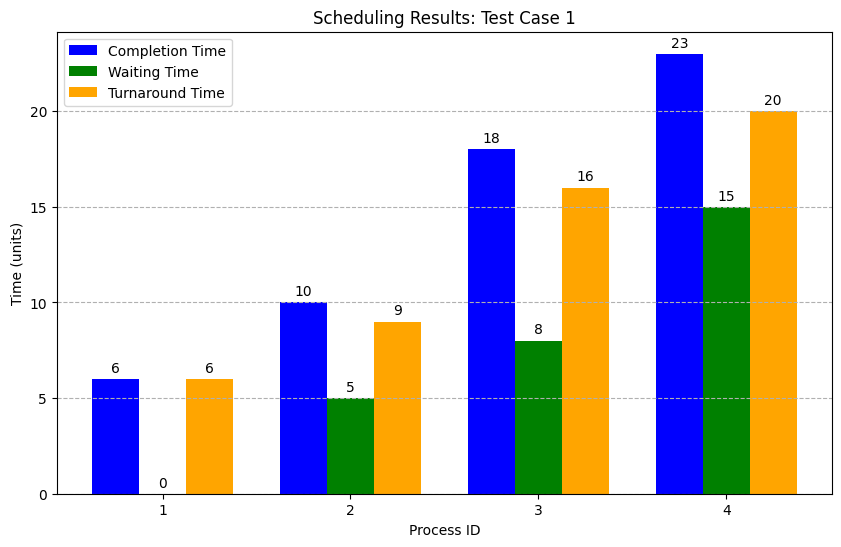

---- Test Case 2: ----
FCFS Scheduling Results:
Process 1: Completion Time: 10, Waiting Time: 0, Turnaround Time: 10
Process 2: Completion Time: 14, Waiting Time: 9, Turnaround Time: 13
Process 3: Completion Time: 16, Waiting Time: 12, Turnaround Time: 14
Process 4: Completion Time: 22, Waiting Time: 13, Turnaround Time: 19


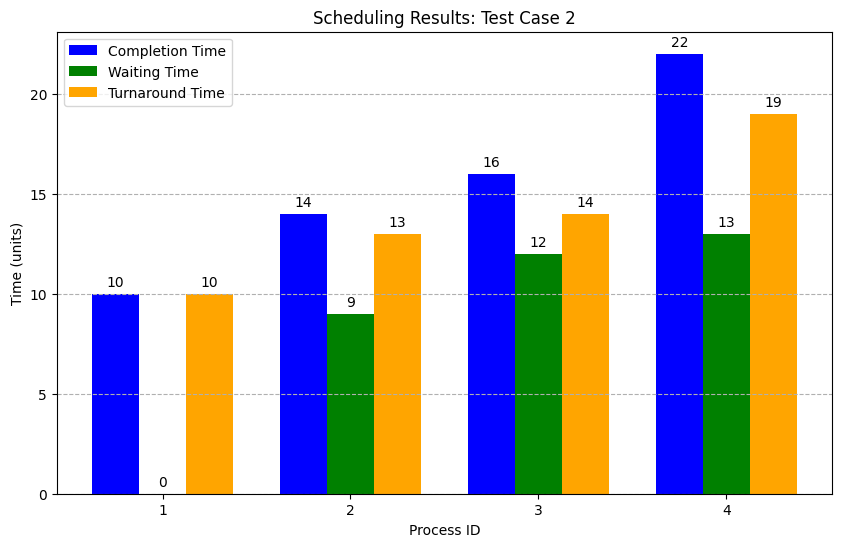

In [27]:
import matplotlib.pyplot as plt

# FCFS Scheduling Algorithm
def fcfs_scheduling(processes):
    n = len(processes)
    # Sort processes by arrival time
    processes.sort(key=lambda x: x['arrival_time'])

    completion_time = 0
    for i, p in enumerate(processes):
        # If CPU is idle, move to the process's arrival time
        if completion_time < p['arrival_time']:
            completion_time = p['arrival_time']
        # Add burst time to get completion time
        completion_time += p['burst_time']
        p['completion_time'] = completion_time
        # Calculate turnaround time
        p['turnaround_time'] = p['completion_time'] - p['arrival_time']
        # Calculate waiting time
        p['waiting_time'] = p['turnaround_time'] - p['burst_time']

    # Print results for each process
    print("FCFS Scheduling Results:")
    for p in processes:
        print(f"Process {p['pid']}: Completion Time: {p['completion_time']}, "
              f"Waiting Time: {p['waiting_time']}, Turnaround Time: {p['turnaround_time']}")

    return processes

# Plot bar charts for completion, waiting, and turnaround times
def plot_results(processes, title):
    # Get process IDs and their times
    pids = [p['pid'] for p in processes]
    completion_times = [p['completion_time'] for p in processes]
    waiting_times = [p['waiting_time'] for p in processes]
    turnaround_times = [p['turnaround_time'] for p in processes]

    fig, ax = plt.subplots(figsize=(10, 6))  # Create a new figure
    bar_width = 0.25  # Set bar width for the plot
    index = range(len(pids))  # X-axis positions for the bars

    # Plot Completion Time bars
    ax.bar([i - bar_width for i in index], completion_times, bar_width, label='Completion Time', color='blue')
    # Plot Waiting Time bars
    ax.bar(index, waiting_times, bar_width, label='Waiting Time', color='green')
    # Plot Turnaround Time bars
    ax.bar([i + bar_width for i in index], turnaround_times, bar_width, label='Turnaround Time', color='orange')

    # Adding annotations for CT, TAT, and WT
    for i in index:
        ax.text(i - bar_width, completion_times[i] + 0.2, str(completion_times[i]), ha='center', va='bottom')
        ax.text(i, waiting_times[i] + 0.2, str(waiting_times[i]), ha='center', va='bottom')
        ax.text(i + bar_width, turnaround_times[i] + 0.2, str(turnaround_times[i]), ha='center', va='bottom')

    # Set X-axis labels and chart title
    ax.set_xlabel('Process ID')
    ax.set_ylabel('Time (units)')
    ax.set_title(f'Scheduling Results: {title}')
    ax.set_xticks(index)  # Set X-axis tick positions
    ax.set_xticklabels(pids)  # Label X-axis ticks with process IDs
    ax.legend()  # Show the legend

    plt.grid(axis='y', linestyle='--')  # Add a grid for better readability
    plt.show()  # Display the plot

# Test Case 1
processes_tc1 = [
    {'pid': 1, 'arrival_time': 0, 'burst_time': 6},
    {'pid': 2, 'arrival_time': 1, 'burst_time': 4},
    {'pid': 3, 'arrival_time': 2, 'burst_time': 8},
    {'pid': 4, 'arrival_time': 3, 'burst_time': 5}
]

# Test Case 2
processes_tc2 = [
    {'pid': 1, 'arrival_time': 0, 'burst_time': 10},
    {'pid': 2, 'arrival_time': 1, 'burst_time': 4},
    {'pid': 3, 'arrival_time': 2, 'burst_time': 2},
    {'pid': 4, 'arrival_time': 3, 'burst_time': 6}
]

# Run FCFS Scheduling for Test Case 1 and plot results
print("---- Test Case 1: ----")
result_tc1 = fcfs_scheduling(processes_tc1)
plot_results(result_tc1, "Test Case 1")

# Run FCFS Scheduling for Test Case 2 and plot results
print("---- Test Case 2: ----")
result_tc2 = fcfs_scheduling(processes_tc2)
plot_results(result_tc2, "Test Case 2")


---
# Shortest Job First (SJF) Scheduling Algorithm

---

### **Overview of the SJF Scheduling Code**

This code implements the **Shortest Job First (SJF)** scheduling algorithm, specifically the non-preemptive variant. In SJF, the process with the smallest burst time is selected for execution next. This approach minimizes the average waiting time for a set of processes.

#### **Key Components**:

1. **SJF Scheduling Function**:
   - The function `sjf_scheduling(processes)` takes a list of processes, each defined by a **Process ID (pid)**, **Arrival Time**, and **Burst Time**.
   - It sorts the processes first by **arrival time** and then by **burst time** to determine the order of execution.
   - For each process, the following metrics are calculated:
     - **Completion Time**: When the process finishes executing.
     - **Turnaround Time**: The total duration from arrival to completion.
     - **Waiting Time**: The amount of time the process waits before it begins execution.
   - Results for each process, including the calculated metrics, are printed to provide insight into the scheduling process.

2. **Gantt Chart Visualization**:
   - The function `plot_gantt_chart_sjf(result, title)` utilizes **Matplotlib** to create a horizontal bar chart representing the execution timeline of the processes.
   - Each bar displays:
     - The **start time** and **completion time** for each process.
     - Annotations for **Completion Time**, **Turnaround Time**, and **Waiting Time** to enhance understanding.
   - A legend is included to clarify the meaning of the annotations on the chart.

3. **Test Cases**:
   - **Test Case 1**: A scenario with varied arrival and burst times, demonstrating the algorithm's effectiveness in scheduling processes.
   - **Test Case 2**: A situation where multiple processes arrive at the same time but have different burst times, illustrating the SJF algorithm’s behavior under these conditions.
   - For each test case, the SJF algorithm is executed, and the corresponding Gantt chart is generated for visual comparison.

#### **Purpose of the Code**:
- This code serves as an educational tool to illustrate how the **SJF scheduling** algorithm functions by prioritizing processes based on their burst times.
- The Gantt chart provides a visual representation of how the processes are executed, allowing for a clearer analysis of performance metrics such as completion time, waiting time, and turnaround time.

---


---- Test Case 1 ----
Process 1: Completion Time = 6, Waiting Time = 0, Turnaround Time = 6
Process 2: Completion Time = 10, Waiting Time = 5, Turnaround Time = 9
Process 4: Completion Time = 15, Waiting Time = 7, Turnaround Time = 12
Process 3: Completion Time = 23, Waiting Time = 13, Turnaround Time = 21


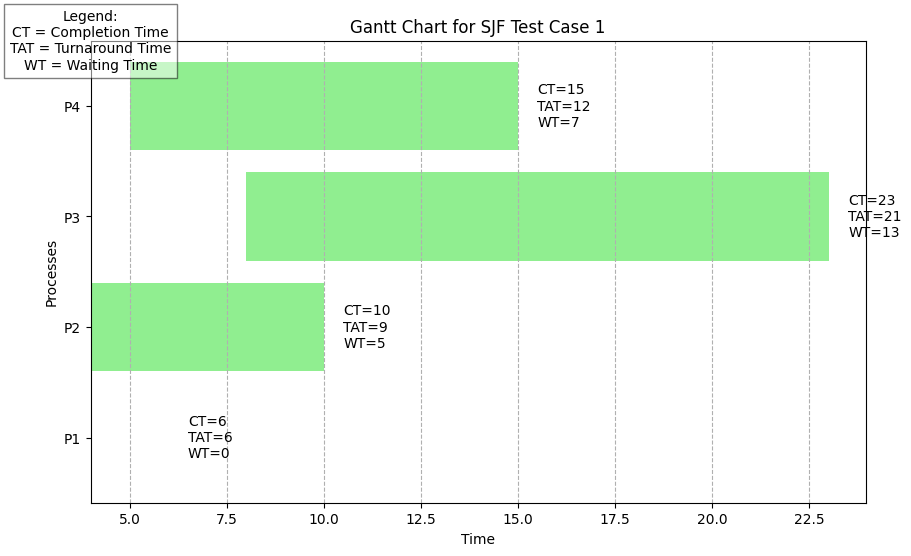

---- Test Case 2 ----
Process 1: Completion Time = 10, Waiting Time = 0, Turnaround Time = 10
Process 3: Completion Time = 12, Waiting Time = 8, Turnaround Time = 10
Process 2: Completion Time = 16, Waiting Time = 11, Turnaround Time = 15
Process 4: Completion Time = 22, Waiting Time = 13, Turnaround Time = 19


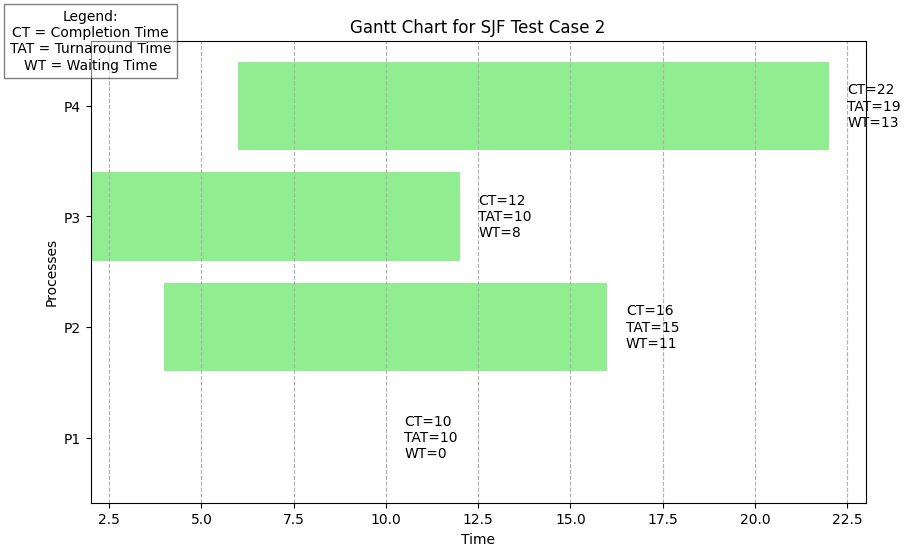

In [13]:
import matplotlib.pyplot as plt

def SJF(algorithm):
    algorithm.sort(key=lambda x: (x[1], x[2]))  # Sort first by arrival and then burst time
    time = 0  # Keeps track of the current time
    result = []  # Array to store the output
    remaining_algorithm = algorithm[:]

    while remaining_algorithm:
        available_algorithm = [p for p in remaining_algorithm if p[1] <= time]
        if available_algorithm:
            # Only choose the process with the shortest burst time
            shortest_path = min(available_algorithm, key=lambda x: x[2])
            # Remove the selected process from the remaining processes
            remaining_algorithm.remove(shortest_path)
            pid, arrival_time, burst_time = shortest_path  # Extract process ID, arrival time, and burst time
            # Calculating completion time for the process
            completion_time = time + burst_time
            # Calculating turnaround time: total time taken from arrival to completion
            turnaround = completion_time - arrival_time
            # Calculating waiting time: time the process spent waiting in the queue
            waiting = turnaround - burst_time
            result.append((pid, completion_time, waiting, turnaround))
            time = completion_time
        else:
            # If no process is available, increment time (CPU is idle)
            time += 1
    # Return the final result list with all process details
    return result

def plot_gantt_chart(result, title):
    fig, ax = plt.subplots(figsize=(10, 6))

    # Setting up the Gantt chart
    for res in result:
        pid, completion_time, waiting, turnaround = res
        # Start time calculation
        start_time = completion_time - (waiting + (completion_time - turnaround))
        ax.barh(pid, completion_time - start_time, left=start_time, color='lightgreen')

        # Adding annotations for CT, TAT, and WT
        ax.text(completion_time + 0.5, pid, f'CT={completion_time}\nTAT={turnaround}\nWT={waiting}',
                color='black', va='center', ha='left')

    # Adding a legend for CT, TAT, and WT
    ax.text(0, 1, 'Legend:\nCT = Completion Time\nTAT = Turnaround Time\nWT = Waiting Time',
            transform=ax.transAxes, fontsize=10, ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5))

    ax.set_xlabel('Time')
    ax.set_ylabel('Processes')
    ax.set_title(title)
    ax.set_yticks([res[0] for res in result])  # Set y-ticks to process IDs
    ax.set_yticklabels([f'P{res[0]}' for res in result])  # Set y-tick labels
    plt.grid(axis='x', linestyle='--')
    plt.show()

# Test Case 1: (PID, Arrival_Time, Burst_Time)
test_case_1 = [(1, 0, 6), (2, 1, 4), (3, 2, 8), (4, 3, 5)]
print("---- Test Case 1 ----")
result_tc1 = SJF(test_case_1)

# Print process details for Test Case 1
for res in result_tc1:
    print(f"Process {res[0]}: Completion Time = {res[1]}, Waiting Time = {res[2]}, Turnaround Time = {res[3]}")

# Plot the Gantt chart for Test Case 1
plot_gantt_chart(result_tc1, 'Gantt Chart for SJF Test Case 1')

# Test Case 2: (PID, Arrival_Time, Burst_Time)
test_case_2 = [(1, 0, 10), (2, 1, 4), (3, 2, 2), (4, 3, 6)]
print("---- Test Case 2 ----")
result_tc2 = SJF(test_case_2)

# Print process details for Test Case 2
for res in result_tc2:
    print(f"Process {res[0]}: Completion Time = {res[1]}, Waiting Time = {res[2]}, Turnaround Time = {res[3]}")

# Plot the Gantt chart for Test Case 2
plot_gantt_chart(result_tc2, 'Gantt Chart for SJF Test Case 2')



---
# Round Robin (RR) Scheduling Algorithm

---
### **Explanation of the Round Robin Scheduling Code**

This code implements the **Round Robin (RR)** scheduling algorithm, which is a preemptive scheduling technique. In RR, processes are assigned a fixed time slice (or quantum) for execution. If a process does not complete within its allotted time, it is placed back in the queue, and the CPU moves to the next process.

#### **Key Components**:

1. **Round Robin Scheduling Function**:
   - The function `RoundRobin(algorithm, time_span)` takes a list of processes, each with a **Process ID (pid)**, **Arrival Time**, and **Burst Time**, along with a **time span** representing the time slice.
   - The processes are sorted by their arrival time, and a queue is initialized with the processes that have arrived by the start time.
   - For each process in the queue, the function calculates:
     - **Completion Time**: When the process finishes execution.
     - **Turnaround Time**: The total time from when the process arrives to when it completes.
     - **Waiting Time**: How long the process had to wait before it started execution.
   - If a process does not finish within its time slice, it is added back to the queue to be executed later.

2. **Gantt Chart Plotting Function**:
   - The function `plot_gantt_chart(result)` uses **Matplotlib** to create a Gantt chart visualizing the execution order of processes.
   - The Gantt chart shows:
     - The execution timeline for each process.
     - Annotations for **Completion Time (CT)**, **Turnaround Time (TAT)**, and **Waiting Time (WT)**.
   - This visualization helps to understand how the Round Robin algorithm handles process execution over time.

3. **Test Cases**:
   - **Test Case 1**: A set of processes with varying arrival times and burst times.
   - **Test Case 2**: A scenario where multiple processes have different burst times but arrive at staggered intervals.
   - For each test case, the **Round Robin Scheduling Algorithm** is applied, and the results are printed alongside a Gantt chart for visual comparison.

#### **Purpose of the Code**:
- This code demonstrates how the **Round Robin scheduling** algorithm allocates CPU time among processes using a time slice.
- The output includes detailed execution statistics for each process and a Gantt chart, allowing for an easy analysis of the scheduling performance and efficiency.

---


---- Test Case 1 ----
Process 1: Completion Time = 10, Waiting Time = 4, Turnaround Time = 10
Process 2: Completion Time = 14, Waiting Time = 9, Turnaround Time = 13
Process 4: Completion Time = 21, Waiting Time = 13, Turnaround Time = 18
Process 3: Completion Time = 23, Waiting Time = 13, Turnaround Time = 21


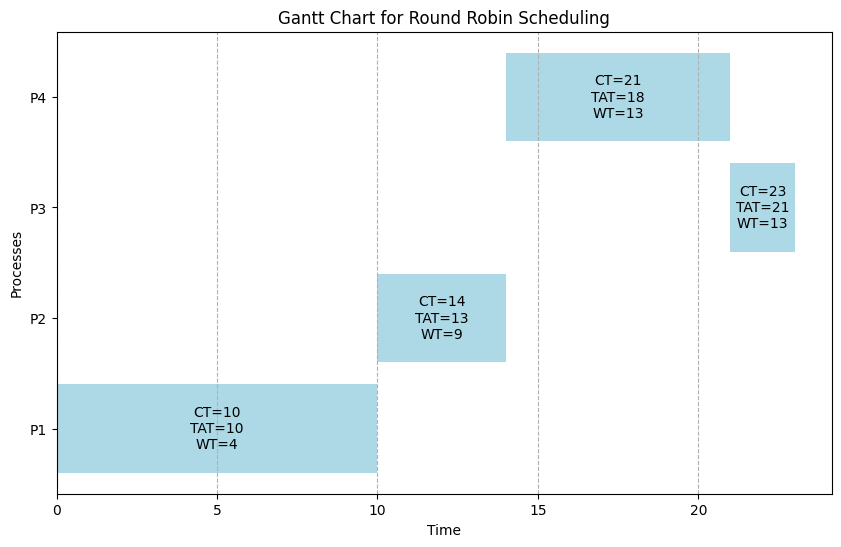

---- Test Case 2 ----
Process 3: Completion Time = 8, Waiting Time = 4, Turnaround Time = 6
Process 2: Completion Time = 14, Waiting Time = 9, Turnaround Time = 13
Process 1: Completion Time = 20, Waiting Time = 10, Turnaround Time = 20
Process 4: Completion Time = 22, Waiting Time = 13, Turnaround Time = 19


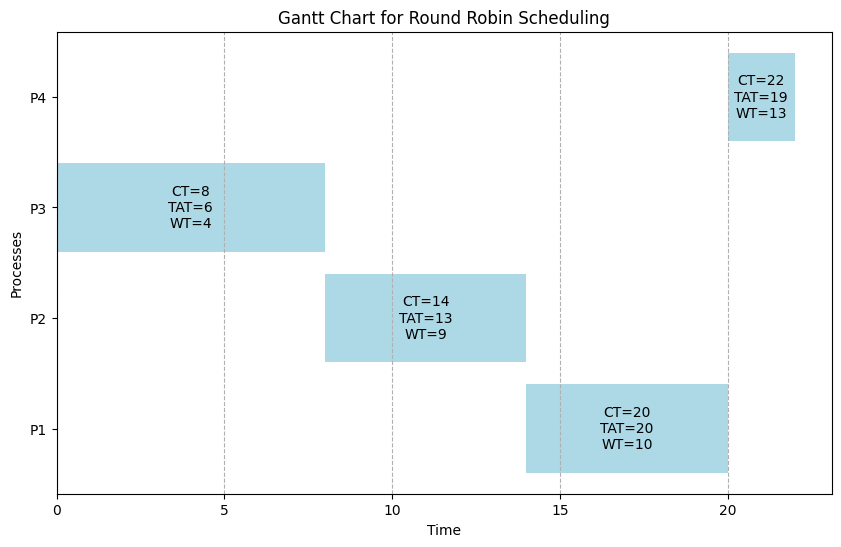

In [20]:
import matplotlib.pyplot as plt

def RoundRobin(algorithm, time_span):
    queue = []  # This will store algorithm in the order of execution
    time = 0  # Keeps track of the current time where time=0
    result = []  # Array to store the output

    # Sort algorithm by arrival time
    algorithm.sort(key=lambda x: x['arrival_time'])

    # Dictionary to keep track of the remaining burst time for each process
    remaining_burst = {p['pid']: p['burst_time'] for p in algorithm}

    # Dictionary to keep track of the waiting time for each process
    waiting_time = {p['pid']: 0 for p in algorithm}

    # Initialize queue with processes that have arrived at time=0
    queue = [p for p in algorithm if p['arrival_time'] <= time]
    remaining_algorithm = algorithm[:]

    while remaining_algorithm:
        # Pop the first process from the queue
        if queue:
            current_process = queue.pop(0)
            pid = current_process['pid']
            arrival = current_process['arrival_time']
            burst = current_process['burst_time']

            if remaining_burst[pid] <= time_span:
                # Update the current time by adding the remaining burst time of the process
                time += remaining_burst[pid]
                remaining_burst[pid] = 0  # The process is finished

                # Calculating completion time for the process
                completion = time

                # Calculating turnaround time: total time taken from arrival to completion
                turnaround = completion - arrival

                # Calculating waiting time: time the process spent waiting in the queue
                waiting = turnaround - burst

                result.append((pid, completion, waiting, turnaround))
                remaining_algorithm.remove(current_process)
            else:
                # If the process cannot complete within the time span, it gets partial execution
                time += time_span
                remaining_burst[pid] -= time_span  # Reduce the remaining burst time

                # Put the process back in the queue to be executed in the next round
                queue.append(current_process)

            # Add newly available processes to the queue
            queue.extend([p for p in remaining_algorithm if p['arrival_time'] <= time and p not in queue])
        else:
            # If no processes are available, increment time (CPU is idle)
            time += 1

    return result

def plot_gantt_chart(result):
    fig, ax = plt.subplots(figsize=(10, 6))

    # Setting up the Gantt chart
    current_time = 0
    for res in result:
        pid, completion_time, waiting, turnaround = res
        duration = completion_time - current_time
        ax.barh(pid, duration, left=current_time, color='lightblue')

        # Add text annotations for completion time, turnaround time, and waiting time
        ax.text(current_time + duration / 2, pid,
                f'CT={completion_time}\nTAT={turnaround}\nWT={waiting}',
                color='black', va='center', ha='center')

        current_time = completion_time

    ax.set_xlabel('Time')
    ax.set_ylabel('Processes')
    ax.set_title('Gantt Chart for Round Robin Scheduling')
    ax.set_yticks([res[0] for res in result])  # Set y-ticks to process IDs
    ax.set_yticklabels([f'P{res[0]}' for res in result])  # Set y-tick labels
    plt.grid(axis='x', linestyle='--')
    plt.show()

# Test Case 1
processes_tc1 = [
    {'pid': 1, 'arrival_time': 0, 'burst_time': 6},
    {'pid': 2, 'arrival_time': 1, 'burst_time': 4},
    {'pid': 3, 'arrival_time': 2, 'burst_time': 8},
    {'pid': 4, 'arrival_time': 3, 'burst_time': 5}
]

# Test Case 2
processes_tc2 = [
    {'pid': 1, 'arrival_time': 0, 'burst_time': 10},
    {'pid': 2, 'arrival_time': 1, 'burst_time': 4},
    {'pid': 3, 'arrival_time': 2, 'burst_time': 2},
    {'pid': 4, 'arrival_time': 3, 'burst_time': 6}
]

# Time slice for Round Robin
time_slice = 2

# Run Round Robin Scheduling for Test Case 1 and plot results
print("---- Test Case 1 ----")
result_tc1 = RoundRobin(processes_tc1, time_slice)
for res in result_tc1:
    print(f"Process {res[0]}: Completion Time = {res[1]}, Waiting Time = {res[2]}, Turnaround Time = {res[3]}")
plot_gantt_chart(result_tc1)

# Run Round Robin Scheduling for Test Case 2 and plot results
print("---- Test Case 2 ----")
result_tc2 = RoundRobin(processes_tc2, time_slice)
for res in result_tc2:
    print(f"Process {res[0]}: Completion Time = {res[1]}, Waiting Time = {res[2]}, Turnaround Time = {res[3]}")
plot_gantt_chart(result_tc2)



---

# **Comparative Analysis of FCFS, SJF, RR**

---

### **Explanation of the CPU Scheduling Comparison Code**

This Python code compares the performance of three popular CPU scheduling algorithms: **First-Come-First-Served (FCFS)**, **Shortest Job First (SJF)**, and **Round Robin (RR)**. These algorithms are implemented and tested on two different test cases, and their performance is evaluated based on **average waiting time** and **average turnaround time**.

#### **Key Components:**

1. **Scheduling Algorithms**:
   - **FCFS Scheduling**: Processes are executed in the order they arrive. The process that arrives first gets executed first, running to completion before the next process starts.
   - **SJF Scheduling (Non-Preemptive)**: The process with the shortest burst time is selected for execution first. If two processes have the same burst time, the one with the earlier arrival time is selected.
   - **Round Robin Scheduling**: Each process is assigned a fixed time slice (quantum), and processes are rotated in a circular queue. If a process needs more time than the quantum, it will be placed at the back of the queue after its time slice.

2. **Test Cases**:
   - **Test Case 1**: A set of processes arriving at different times, each with varying burst times.
   - **Test Case 2**: All processes arriving simultaneously but with different burst times, allowing for a clear comparison of how each algorithm handles contention.

3. **Comparative Analysis**:
   - For each algorithm, the following metrics are computed:
     - **Average Waiting Time**: The average time a process spends waiting in the queue before it starts execution.
     - **Average Turnaround Time**: The average total time taken from the moment a process arrives to the moment it completes.
   - These metrics are printed and visualized for easy comparison.

4. **Visualization**:
   - A bar chart is generated using **Matplotlib** to display the average waiting time and average turnaround time for the three algorithms. This visual representation aids in identifying which scheduling algorithm performs more efficiently in different scenarios.

5. **Code Flow**:
   - The `compare_algorithms()` function is responsible for:
     - Running each scheduling algorithm (FCFS, SJF, and Round Robin) for the defined test cases.
     - Computing the average waiting and turnaround times for each algorithm.
     - Plotting the comparison of these metrics, allowing for a straightforward visual analysis of the scheduling strategies' effectiveness.

---


---- Test Case 1: Basic Test Case ----
FCFS -> Avg Waiting Time: 7.00, Avg Turnaround Time: 12.75
SJF  -> Avg Waiting Time: 7.00, Avg Turnaround Time: 12.75
RR   -> Avg Waiting Time: 10.50, Avg Turnaround Time: 16.25


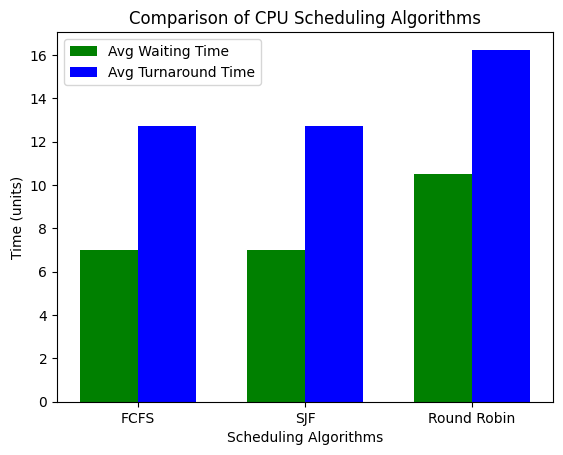

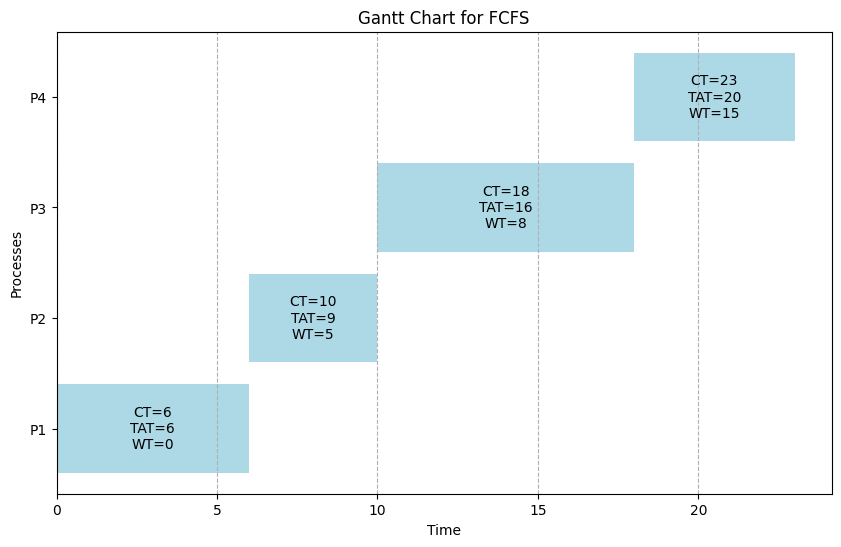

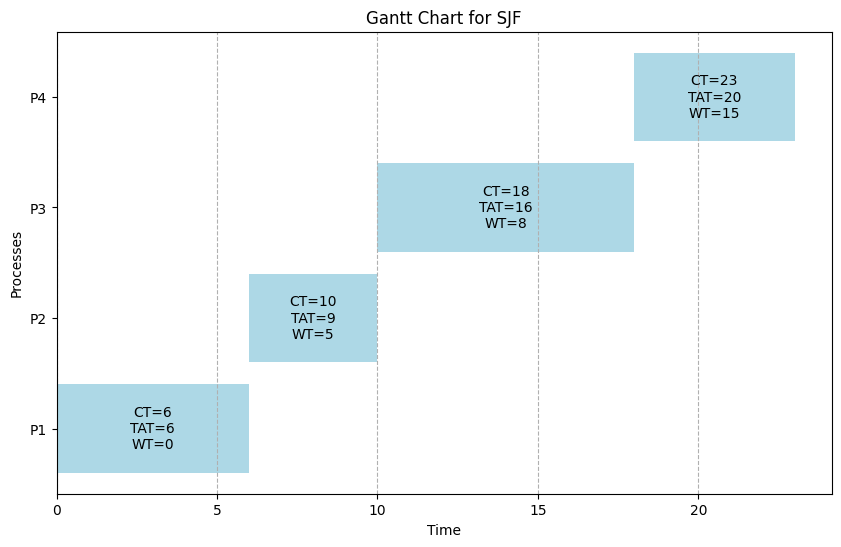

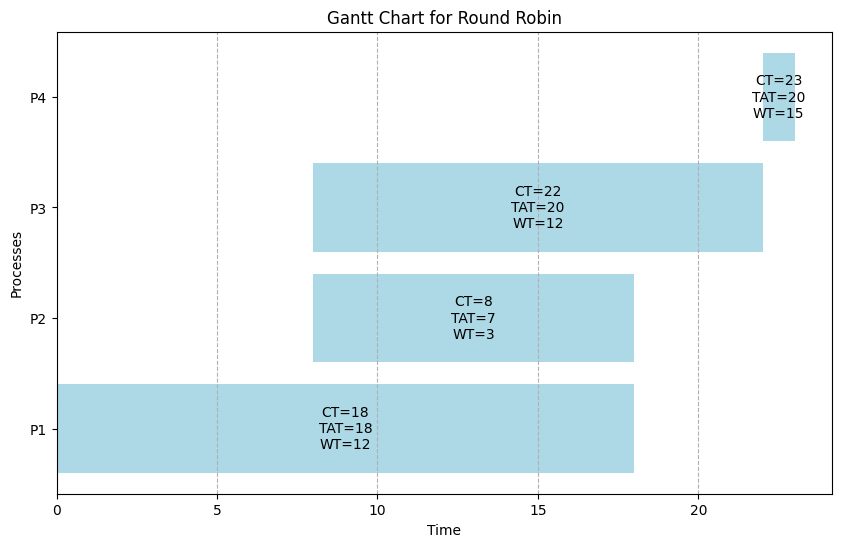

---- Test Case 2: Processes Arriving at the Same Time ----
FCFS -> Avg Waiting Time: 8.50, Avg Turnaround Time: 14.00
SJF  -> Avg Waiting Time: 8.50, Avg Turnaround Time: 14.00
RR   -> Avg Waiting Time: 8.00, Avg Turnaround Time: 13.50


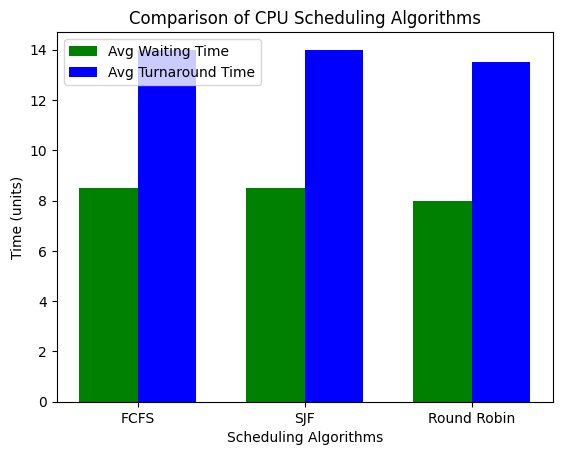

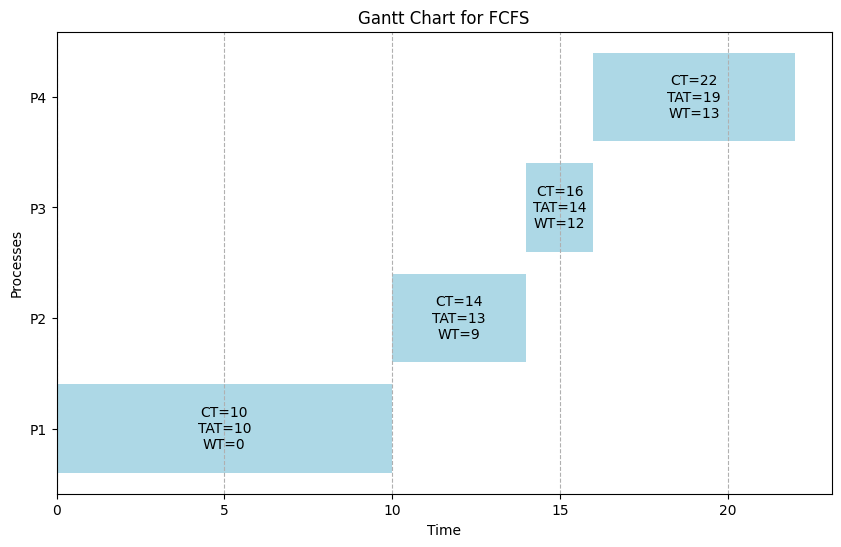

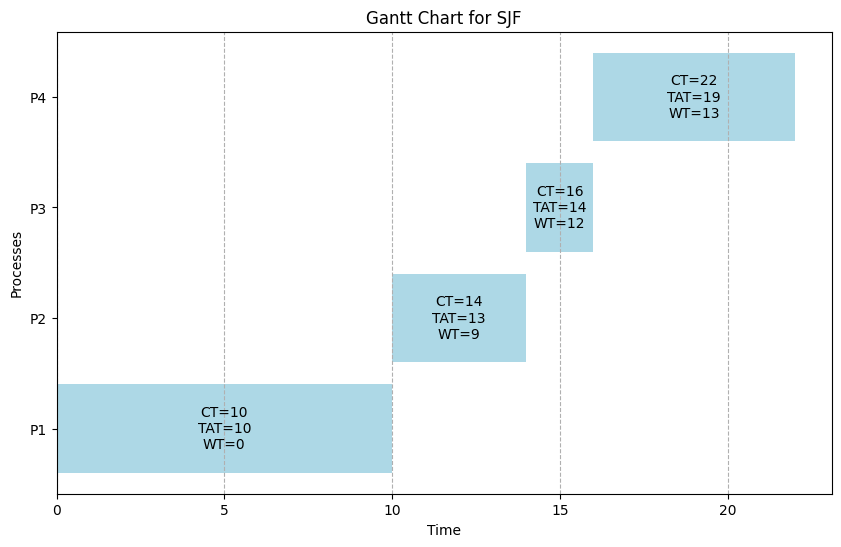

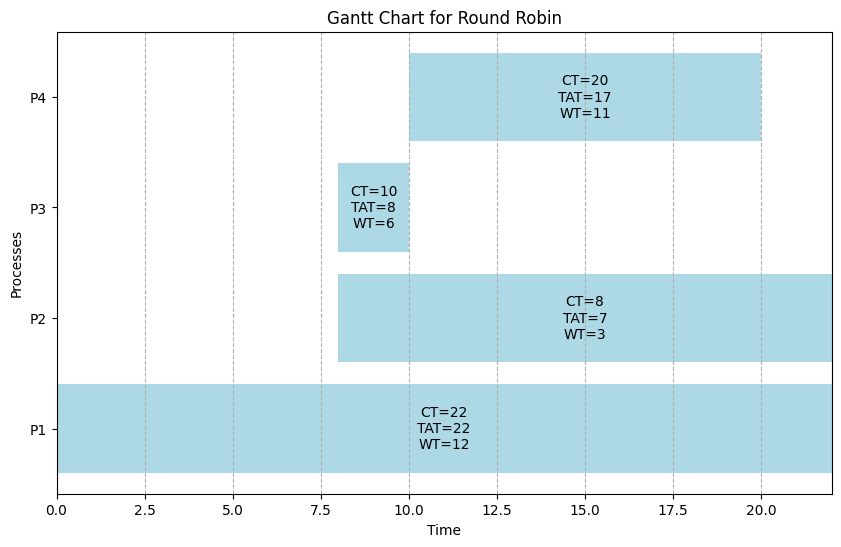

In [24]:
import matplotlib.pyplot as plt
from copy import deepcopy

# Function to calculate average waiting time and turnaround time
def calculate_averages(processes):
    n = len(processes)
    total_waiting_time = sum([p['waiting_time'] for p in processes])
    total_turnaround_time = sum([p['turnaround_time'] for p in processes])
    avg_waiting_time = total_waiting_time / n
    avg_turnaround_time = total_turnaround_time / n
    return avg_waiting_time, avg_turnaround_time

# FCFS Scheduling Algorithm
def fcfs_scheduling(processes):
    processes.sort(key=lambda x: x['arrival_time'])
    completion_time = 0
    for p in processes:
        if completion_time < p['arrival_time']:
            completion_time = p['arrival_time']
        completion_time += p['burst_time']
        p['completion_time'] = completion_time
        p['turnaround_time'] = p['completion_time'] - p['arrival_time']
        p['waiting_time'] = p['turnaround_time'] - p['burst_time']
    return processes

# SJF Scheduling Algorithm (Non-Preemptive)
def sjf_scheduling(processes):
    processes.sort(key=lambda x: (x['arrival_time'], x['burst_time']))
    completion_time = 0
    for p in processes:
        if completion_time < p['arrival_time']:
            completion_time = p['arrival_time']
        completion_time += p['burst_time']
        p['completion_time'] = completion_time
        p['turnaround_time'] = p['completion_time'] - p['arrival_time']
        p['waiting_time'] = p['turnaround_time'] - p['burst_time']
    return processes

# Round Robin Scheduling Algorithm
def round_robin_scheduling(processes, quantum):
    n = len(processes)
    remaining_burst_time = [p['burst_time'] for p in processes]
    waiting_time = [0] * n
    turnaround_time = [0] * n
    completion_time = [0] * n
    time = 0

    while any(remaining_burst_time):
        for i in range(n):
            if remaining_burst_time[i] > 0:
                if remaining_burst_time[i] > quantum:
                    time += quantum
                    remaining_burst_time[i] -= quantum
                else:
                    time += remaining_burst_time[i]
                    remaining_burst_time[i] = 0
                    completion_time[i] = time
                    turnaround_time[i] = completion_time[i] - processes[i]['arrival_time']
                    waiting_time[i] = turnaround_time[i] - processes[i]['burst_time']

    for i, p in enumerate(processes):
        p['completion_time'] = completion_time[i]
        p['waiting_time'] = waiting_time[i]
        p['turnaround_time'] = turnaround_time[i]

    return processes

# Function to run all three algorithms and compare results
def compare_algorithms(processes, quantum):
    processes_fcfs = deepcopy(processes)
    processes_sjf = deepcopy(processes)
    processes_rr = deepcopy(processes)

    # Run FCFS
    result_fcfs = fcfs_scheduling(processes_fcfs)
    avg_waiting_fcfs, avg_turnaround_fcfs = calculate_averages(result_fcfs)

    # Run SJF
    result_sjf = sjf_scheduling(processes_sjf)
    avg_waiting_sjf, avg_turnaround_sjf = calculate_averages(result_sjf)

    # Run Round Robin
    result_rr = round_robin_scheduling(processes_rr, quantum)
    avg_waiting_rr, avg_turnaround_rr = calculate_averages(result_rr)

    # Print averages
    print(f"FCFS -> Avg Waiting Time: {avg_waiting_fcfs:.2f}, Avg Turnaround Time: {avg_turnaround_fcfs:.2f}")
    print(f"SJF  -> Avg Waiting Time: {avg_waiting_sjf:.2f}, Avg Turnaround Time: {avg_turnaround_sjf:.2f}")
    print(f"RR   -> Avg Waiting Time: {avg_waiting_rr:.2f}, Avg Turnaround Time: {avg_turnaround_rr:.2f}")

    # Visualization
    algorithms = ['FCFS', 'SJF', 'Round Robin']
    avg_waiting_times = [avg_waiting_fcfs, avg_waiting_sjf, avg_waiting_rr]
    avg_turnaround_times = [avg_turnaround_fcfs, avg_turnaround_sjf, avg_turnaround_rr]

    fig, ax = plt.subplots()
    bar_width = 0.35
    index = range(len(algorithms))

    # Plot bar charts for waiting time and turnaround time
    ax.bar(index, avg_waiting_times, bar_width, label='Avg Waiting Time', color='green')
    ax.bar([i + bar_width for i in index], avg_turnaround_times, bar_width, label='Avg Turnaround Time', color='blue')

    ax.set_xlabel('Scheduling Algorithms')
    ax.set_ylabel('Time (units)')
    ax.set_title('Comparison of CPU Scheduling Algorithms')
    ax.set_xticks([i + bar_width / 2 for i in index])
    ax.set_xticklabels(algorithms)
    ax.legend()

    plt.show()

# Gantt Chart Plotting Function
def plot_gantt_chart(processes, algorithm_name):
    fig, ax = plt.subplots(figsize=(10, 6))

    current_time = 0
    for p in processes:
        pid = p['pid']
        burst_time = p['burst_time']
        arrival_time = p['arrival_time']

        # Calculate duration
        duration = p['completion_time'] - current_time
        ax.barh(pid, duration, left=current_time, color='lightblue')

        # Add text annotations for CT, TAT, and WT
        ax.text(current_time + duration / 2, pid,
                f'CT={p["completion_time"]}\nTAT={p["turnaround_time"]}\nWT={p["waiting_time"]}',
                color='black', va='center', ha='center')

        current_time = p['completion_time']

    ax.set_xlabel('Time')
    ax.set_ylabel('Processes')
    ax.set_title(f'Gantt Chart for {algorithm_name}')
    ax.set_yticks([p['pid'] for p in processes])
    ax.set_yticklabels([f'P{p["pid"]}' for p in processes])
    plt.grid(axis='x', linestyle='--')
    plt.show()

# Test Case 1: Basic Test Case
processes_tc1 = [
    {'pid': 1, 'arrival_time': 0, 'burst_time': 6},
    {'pid': 2, 'arrival_time': 1, 'burst_time': 4},
    {'pid': 3, 'arrival_time': 2, 'burst_time': 8},
    {'pid': 4, 'arrival_time': 3, 'burst_time': 5}
]

# Test Case 2
processes_tc2 = [
    {'pid': 1, 'arrival_time': 0, 'burst_time': 10},
    {'pid': 2, 'arrival_time': 1, 'burst_time': 4},
    {'pid': 3, 'arrival_time': 2, 'burst_time': 2},
    {'pid': 4, 'arrival_time': 3, 'burst_time': 6}
]

# Compare FCFS, SJF, and Round Robin for Test Case 1 (Quantum = 4)
print("---- Test Case 1: Basic Test Case ----")
compare_algorithms(processes_tc1, quantum=4)
plot_gantt_chart(fcfs_scheduling(deepcopy(processes_tc1)), 'FCFS')
plot_gantt_chart(sjf_scheduling(deepcopy(processes_tc1)), 'SJF')
plot_gantt_chart(round_robin_scheduling(deepcopy(processes_tc1), quantum=4), 'Round Robin')

# Compare FCFS, SJF, and Round Robin for Test Case 2 (Quantum = 4)
print("---- Test Case 2: Processes Arriving at the Same Time ----")
compare_algorithms(processes_tc2, quantum=4)
plot_gantt_chart(fcfs_scheduling(deepcopy(processes_tc2)), 'FCFS')
plot_gantt_chart(sjf_scheduling(deepcopy(processes_tc2)), 'SJF')
plot_gantt_chart(round_robin_scheduling(deepcopy(processes_tc2), quantum=4), 'Round Robin')
